In [14]:
import time
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import pylab

from scipy.stats import poisson


In [15]:
#read csv file 
train_csv = pd.read_csv("../MLinTheUnknown-Data/X_train.csv", header = None)

# data = pd.read_csv("./real_estate.csv",header =None)
label_csv = pd.read_csv("../MLinTheUnknown-Data/y_train.csv",header = None)


val_train_csv = pd.read_csv("../MLinTheUnknown-Data/X_val.csv", header = None)
val_label_csv =pd.read_csv("../MLinTheUnknown-Data/y_val.csv", header = None)


In [16]:
print("Start : %s\n" % time.ctime())

deleted_index = []
data_class_count = {}
data_class_samples_index = {}

for p in range(1,7):
    label_csv = pd.DataFrame(label_csv)
    
    data_cut = pd.DataFrame(columns = train_csv.columns)
    temp = []
    for j in range(8346):
        if label_csv.iloc[j,0] == p:
            data_cut = data_cut.append(train_csv.iloc[j,0:128])
            temp.append(j)
            
    data_class_samples_index[p]= temp
    
    data_class_count[p]=len(data_cut)
#     print(len(data_cut))
    del_index = []
    
    for n in range(128):
    # 3 sigma
        mean = data_cut.iloc[:,n].mean()
        std = data_cut.iloc[:,n].std()
        for i, m in enumerate(data_cut.index):      
            if (data_cut.iloc[i,n] > (mean+ 4*std)) or (data_cut.iloc[i,n] < (mean - 4*std)):
                del_index.append(m)
    
    del_index = list(sorted(set(del_index)))
    print(len(del_index))
    
    deleted_index = deleted_index + del_index
    deleted_index = list(sorted(set(deleted_index)))
    
#     # 画图
#     k = p
#     outliers = del_index
    
#     label_csv = label_csv.values.ravel()
#     y_pred = np.array([-1 if i in outliers else 1 for i in range(train_csv.shape[0])])
#     train_csv['128'] = y_pred
#     data = train_csv[label_csv == k]
#     data = data.reset_index(drop=True)
#     y_pred = data['128'].values.ravel()
#     data = data.iloc[:, :128]
    
#     fig = plt.figure()
#     for i in range(128):
#         my_plot = plt.scatter(data.iloc[:, i], y=y_pred, c=y_pred, marker='o', s=10)
#         plt.legend(*my_plot.legend_elements(),title="Classes")
#         plt.title(f"Class {k} dim-{i}\noutliers:{len(outliers)}  inliers:{data.shape[0]-len(outliers)}")
#         plt.savefig(f'../3sigma/{k}/{i+1}_d.png', dpi=300)
#         plt.clf()
#     print(f'finish the class{k} plot')
    
print("Complete deleting data : %s\n" % time.ctime())
print("the total number of data deleted: ", len(deleted_index))

Start : Mon Apr 26 18:55:14 2021

61
101
77
28
104
76
Complete deleting data : Mon Apr 26 18:56:28 2021

the total number of data deleted:  447


In [17]:
data_class_count

{1: 1525, 2: 1758, 3: 994, 4: 1170, 5: 1785, 6: 1114}

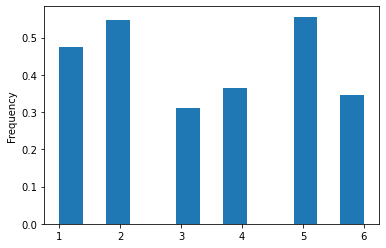

In [18]:
# plt.style.use('seaborn')
label_csv.iloc[:,0].plot(kind='hist', bins=13, density = True)
# label_csv.iloc[:,0].plot(kind='kde')
plt.savefig("class_distribution柱状.png")

plt.show()


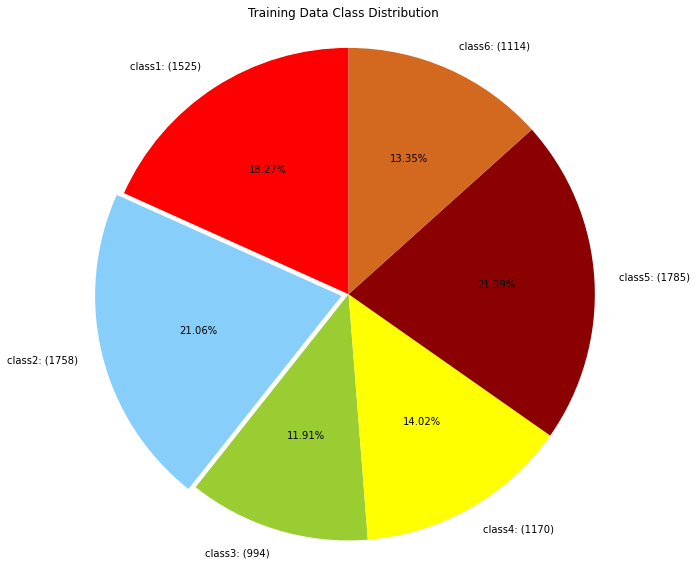

In [19]:
data_class_count
# labels = list(data_class_count.keys())

labels = [u'class1: (1525)',u'class2: (1758)',u'class3: (994)',u'class4: (1170)',u'class5: (1785)',u'class6: (1114)' ]

sizes  = list(data_class_count.values())
colors = ['red','lightskyblue','yellowgreen','yellow','DarkRed','Chocolate']
explode = (0,0.03,0,0,0,0)

plt.figure(figsize=(12,10))

plt.title("Training Data Class Distribution")

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct = '%3.2f%%',  shadow = False,  startangle =90,  pctdistance = 0.6) 
plt.axis('equal')
# plt.legend()
plt.savefig("class_distribution饼状.png")
plt.show()


In [20]:
data_class_count

{1: 1525, 2: 1758, 3: 994, 4: 1170, 5: 1785, 6: 1114}

In [21]:
# first drop the unvalid points

In [22]:
X_tain_clean = train_csv.drop(train_csv.index[deleted_index]).reset_index(drop=True)
y_tain_clean = label_csv.drop(label_csv.index[deleted_index]).reset_index(drop=True)

X_tain_clean.to_csv('X_tain_clean.csv', index=False, sep=',')
y_tain_clean.to_csv('y_tain_clean.csv', index=False, sep=',')

In [23]:
t_4sigma_cut = pd.DataFrame()
t_4sigma_cut['value']=X_tain_clean[0]
t_4sigma_cut['y']=y_tain_clean
t_4sigma_cut

,value,y
0,10549.4970,2.0
1,2255.0098,4.0
2,73262.9595,4.0
3,44069.7910,2.0
4,6860.3404,2.0
...,...,...
7894,10694.7356,2.0
7895,45169.9385,1.0
7896,1500.6678,3.0
7897,119398.0036,1.0


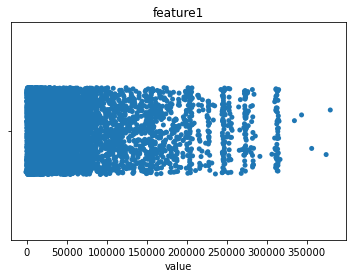

<AxesSubplot:xlabel='y', ylabel='value'>

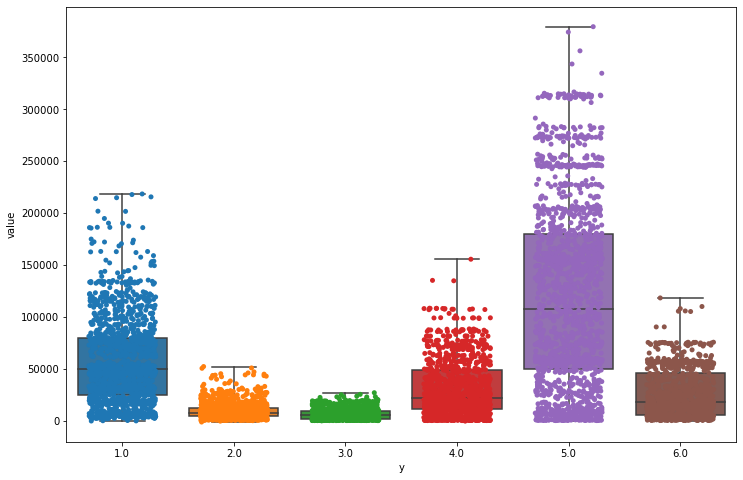

In [24]:
import seaborn as sns

plt.title("feature1")

sns.stripplot(x=t_4sigma_cut["value"],jitter=0.2 )
plt.show()


plt.figure(figsize=(12, 8))
# sns.violinplot(x="labels", y="values", data=data_cut, inner=None)

sns.boxplot(x="y", y="value", data=t_4sigma_cut, whis=np.inf)
sns.stripplot(x="y", y="value", data=t_4sigma_cut,jitter=0.3)

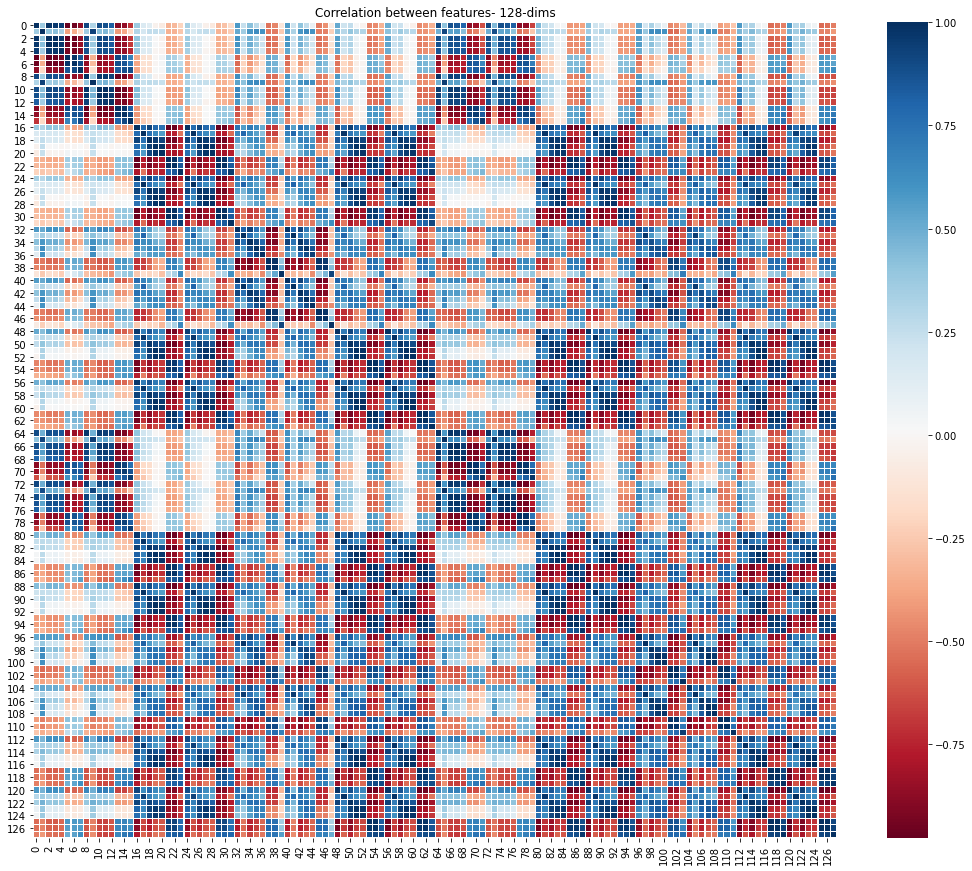

In [25]:
corr_total  = np.corrcoef(X_tain_clean.values,rowvar=0)
f,ax = plt.subplots(figsize = (18, 15))

sns.heatmap(corr_total, cmap='RdBu', linewidths = 0.05, ax =ax)

plt.title('Correlation between features- 128-dims')
plt.show()

In [26]:
import scipy.stats as stats

delete_columns_dist ={}

for i in range(128):
    delete_columns_dist[i]=[]
    for j in range(i+1,128):
#         if i==j:
#             continue
        corr_i_j = stats.pearsonr(X_tain_clean.iloc[:,i],X_tain_clean.iloc[:,j])
    
        if corr_i_j[0] >= 0.95:
            delete_columns_dist[i].append(j)


In [27]:
delete_columns_dist

{0: [2, 3],
 1: [],
 2: [3, 4],
 3: [4],
 4: [],
 5: [6],
 6: [],
 7: [],
 8: [10, 11, 64],
 9: [65],
 10: [11, 12, 64, 66],
 11: [12, 66],
 12: [],
 13: [14, 69],
 14: [70],
 15: [71],
 16: [24, 48, 56, 80, 88],
 17: [25, 49, 57, 81, 89],
 18: [19, 26, 27, 50, 58, 82, 83, 90, 91],
 19: [20, 26, 27, 28, 51, 52, 59, 60, 83, 84, 91, 92, 115, 116, 123, 124],
 20: [27, 28, 51, 52, 59, 60, 83, 84, 91, 92, 116, 124],
 21: [22, 29, 30, 53, 54, 61, 62, 85, 86, 93, 94],
 22: [29, 30, 53, 54, 61, 62, 85, 86, 93, 94],
 23: [31, 55, 63],
 24: [48, 56, 80, 88],
 25: [49, 57, 81, 89],
 26: [27, 50, 58, 82, 83, 90, 91],
 27: [28, 51, 52, 59, 60, 83, 84, 91, 92, 115, 116, 123, 124],
 28: [51, 52, 59, 60, 83, 84, 91, 92, 116],
 29: [30, 53, 54, 61, 62, 85, 86, 93, 94],
 30: [53, 54, 61, 62, 85, 86, 93, 94],
 31: [],
 32: [40],
 33: [41, 97],
 34: [42],
 35: [43],
 36: [],
 37: [38, 45, 46],
 38: [45, 46],
 39: [],
 40: [],
 41: [97, 105],
 42: [],
 43: [],
 44: [],
 45: [46],
 46: [],
 47: [],
 48: [56

In [28]:
del_columns = []
for key, values in delete_columns_dist.items():
    del_columns = del_columns + values
del_columns = list(set(del_columns))
    
print(len(del_columns))
print(del_columns)

99
[2, 3, 4, 6, 10, 11, 12, 14, 19, 20, 22, 24, 25, 26, 27, 28, 29, 30, 31, 38, 40, 41, 42, 43, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 97, 100, 102, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]


In [29]:
# second drop based on correlations among features

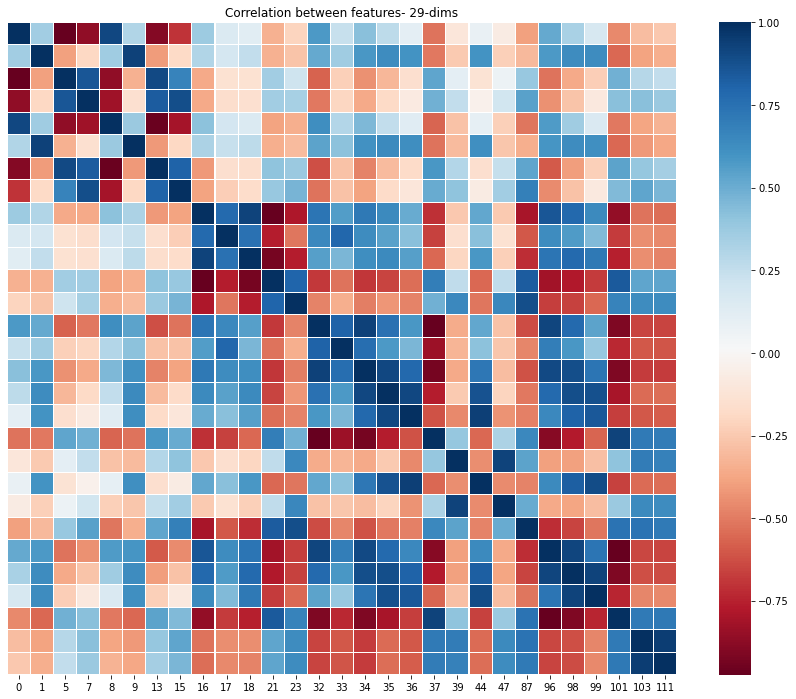

In [30]:
X_tain_clean_xxx_cl = X_tain_clean.drop(columns=X_tain_clean.columns[del_columns])



corr_xxx  = np.corrcoef(X_tain_clean_xxx_cl,rowvar=0)

f,ax = plt.subplots(figsize = (15, 12))

mask = np.zeros_like(corr_xxx)

mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_xxx, xticklabels=X_tain_clean_xxx_cl.columns, yticklabels=False, cmap='RdBu', linewidths = 0.05, ax =ax)

plt.title(f'Correlation between features- {128- len(del_columns)}-dims')
plt.show()




In [31]:
from sklearn.preprocessing import StandardScaler
# scaler_1 = StandardScaler()

# X_train_re_fes = scaler_1.fit_transform(X_tain_clean_xxx_cl.values)

X_train_re_fes = pd.DataFrame(X_tain_clean_xxx_cl)

X_train_re_fes.columns = X_tain_clean_xxx_cl.columns
X_train_re_fes['label']= y_tain_clean



X_train_re_fes

,0,1,5,7,8,9,13,15,16,17,...,44,47,87,96,98,99,101,103,111,label
0,10549.4970,4.649028,-1.795881,-2.974630,12602.3785,5.147949,-2.179339,-3.881514,37007.3623,11.063610,...,6.208689,-2.297993,-19.038561,7009.1133,2.688504,7.859097,-1.774891,-4.373913,-4.045189,2.0
1,2255.0098,1.216170,-0.724791,-6.743371,8654.2773,1.516055,-2.072658,-17.106739,3747.3496,1.733880,...,4.490686,-4.263972,-4.506432,1301.2249,0.781107,2.561139,-0.345704,-3.135604,-2.780614,4.0
2,73262.9595,10.763480,-14.626887,-32.201706,72377.0762,9.398184,-14.494025,-34.415674,18948.0735,6.204221,...,5.743223,-2.490731,-9.779252,5652.5640,2.135992,5.764291,-1.259689,-3.530913,-3.223983,4.0
3,44069.7910,5.043857,-8.874675,-38.460729,48995.5728,9.506312,-8.957747,-36.164818,27799.7867,9.588624,...,6.705770,-5.291807,-18.860980,5418.7883,2.225952,6.815618,-1.133322,-4.041928,-4.188243,2.0
4,6860.3404,2.485188,-1.159993,-6.934935,16921.8320,2.999328,-3.187794,-15.783863,28941.5606,9.740033,...,6.777144,-4.908687,-21.684142,5286.6301,2.448768,7.464520,-1.217102,-4.000820,-4.970829,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7894,10694.7356,3.728484,-1.710194,-9.670130,26172.0728,4.655514,-4.800040,-19.985596,33618.9654,8.550768,...,6.363470,-5.071241,-25.400968,6239.6694,2.840222,6.984928,-1.550408,-4.906184,-5.127003,2.0
7895,45169.9385,10.340504,-9.526939,-34.089898,37635.5376,8.165302,-7.500577,-27.625650,15510.4258,4.631189,...,8.122712,-4.858955,-10.515552,5574.8848,3.113239,10.887425,-1.237936,-4.504976,-4.488997,1.0
7896,1500.6678,1.989343,-0.370875,-3.322006,9579.2744,2.859317,-1.780867,-9.112300,17323.6338,3.365442,...,4.465188,-4.825065,-8.374103,5389.2925,2.050422,4.187950,-1.199281,-4.847824,-4.340984,3.0
7897,119398.0036,34.267652,-27.339333,-70.115525,102710.8335,27.364931,-22.928775,-63.948912,34390.4311,9.095775,...,12.286104,-4.250819,-24.788720,11530.3098,5.084000,15.297785,-2.811206,-6.568445,-6.103557,1.0


In [32]:
import scipy.stats as stats

# train_X_y_re_minor_corr = pd.DataFrame(columns = X_train_re_fes.columns)
# train_X_y_re_minor_corr['label'] = X_train_re_fes.iloc[:,-1]

index_corrScore_xy = {}

# Compute Pearson Correlation between label and each feature, 
for i, true_index in enumerate(X_train_re_fes.columns):
    if i== len(X_train_re_fes.columns)-1:
        break
    
    a= X_train_re_fes.iloc[:,i]
    b = X_train_re_fes.iloc[:,-1]
    
    corr_ab = stats.pearsonr(a,b)[0]  # return 2 values，第一个两者之间相关系数， 第二个值为a和b不同为零假设下的p值
    
#     if corr_ab < 0:
#         train_X_y_re_minor_corr[true_index] = -a
        
#     if corr_ab>=0:
#         train_X_y_re_minor_corr[true_index] = a
        
    corr_ab = round(corr_ab,5)
#     corr_ab = round(abs(corr_ab),5)
    
    index_corrScore_xy[true_index]=corr_ab



In [33]:
output = pd.DataFrame({'True_Index':list(index_corrScore_xy.keys()), 'feature_corr_label':list(index_corrScore_xy.values())})
output.sort_values(by="feature_corr_label", ascending=False, inplace= True)

# output.set_index(['True_Index'],inplace=True)

# output.to_csv('feature_correlation_label.csv', index=False, sep=',')
output.head(10)


,True_Index,feature_corr_label
4,8,0.34795
11,21,0.26145
26,101,0.22775
0,0,0.22738
18,37,0.13125
12,23,0.11916
28,111,0.07837
27,103,0.06032
22,87,0.05988
21,47,-0.07432


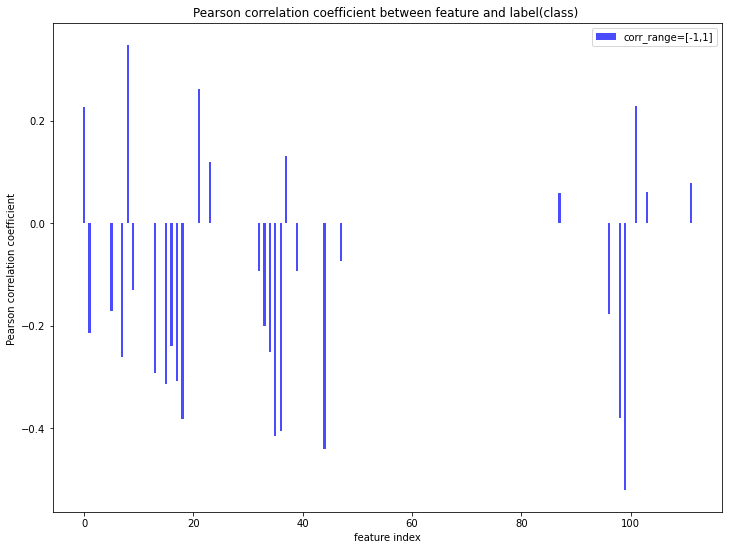

In [34]:
x = output.iloc[:,0].values

height = output.iloc[:,1].values

plt.figure(figsize=(12,9))
plt.title("Pearson correlation coefficient between feature and label(class) ")
plt.bar(x, height, width=0.4, alpha=0.7, color='blue', label="corr_range=[-1,1]")
plt.xlabel("feature index")
plt.ylabel("Pearson correlation coefficient ")
plt.legend()
plt.show()


In [35]:
del_2nd_index=[]
for key,value in index_corrScore_xy.items():
    
    if  -2 < index_corrScore_xy[key] < 0:
        del_2nd_index.append(key)
    if 0 < index_corrScore_xy[key] < 0.15:
        del_2nd_index.append(key)
        
print(len(del_2nd_index))
print(del_2nd_index)

25
[1, 5, 7, 9, 13, 15, 16, 17, 18, 23, 32, 33, 34, 35, 36, 37, 39, 44, 47, 87, 96, 98, 99, 103, 111]


In [36]:
total_del_columns = del_2nd_index+del_columns
print(total_del_columns)

[1, 5, 7, 9, 13, 15, 16, 17, 18, 23, 32, 33, 34, 35, 36, 37, 39, 44, 47, 87, 96, 98, 99, 103, 111, 2, 3, 4, 6, 10, 11, 12, 14, 19, 20, 22, 24, 25, 26, 27, 28, 29, 30, 31, 38, 40, 41, 42, 43, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 97, 100, 102, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]


In [37]:
# 3rd drop, after correlations between features and labels
# generate features, which can do the model


In [38]:
X_tain_final = X_tain_clean.drop(columns=X_tain_clean.columns[total_del_columns])


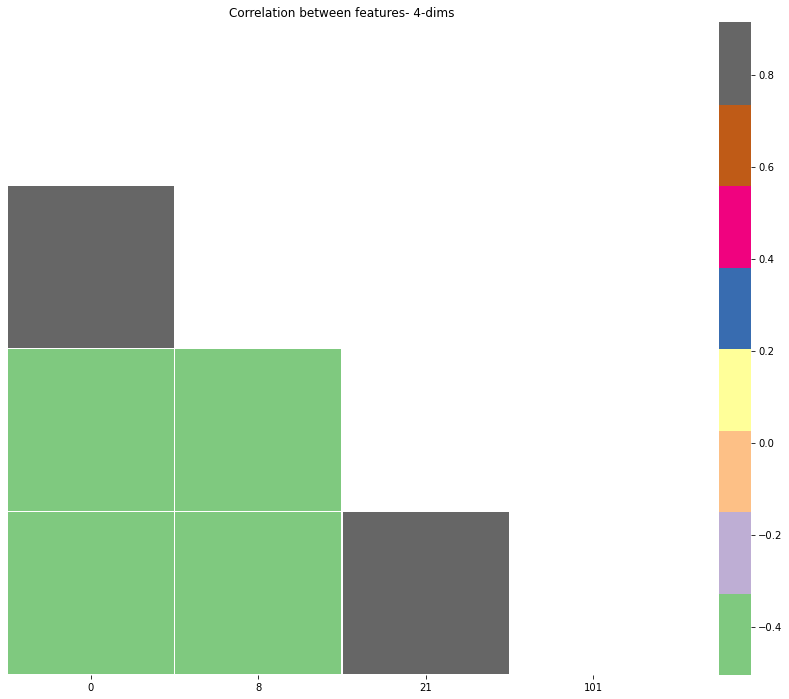

In [39]:
corr_final  = np.corrcoef(X_tain_final,rowvar=0)

f,ax = plt.subplots(figsize = (15, 12))

mask = np.zeros_like(corr_final)

mask[np.triu_indices_from(mask)] = True


sns.heatmap(corr_final,mask = mask, xticklabels=X_tain_final.columns, yticklabels=False, cmap='Accent', linewidths = 0.05, ax =ax)

plt.title(f'Correlation between features- {128- len(total_del_columns)}-dims')
plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_train_csv = scaler.fit_transform(train_csv.values)
new_train_csv = pd.DataFrame(new_train_csv)

# newXtrin = scaler.transform(Xtrain)

In [41]:
cor_train_X_y= pd.concat([new_train_csv, label_csv], axis=1, ignore_index= True)
cor_train_X_y= cor_train_X_y.drop(cor_train_X_y.index[deleted_index]).reset_index(drop=True)
cor_train_X_y

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,-0.572369,-0.125036,-0.611294,-0.641469,-0.625501,0.580252,0.572944,0.438639,-0.699353,-0.081183,...,-0.292436,1.347378,1.071017,1.694025,1.923091,1.792474,-1.236454,-0.998990,-0.256514,2.0
1,-0.693007,-0.335657,-0.690634,-0.666842,-0.519219,0.665638,0.614753,0.408778,-0.761880,-0.266980,...,0.516076,-1.036657,-0.935717,-0.938436,-0.809086,-0.398710,0.903021,0.835909,0.510989,4.0
2,0.339763,0.250112,0.462258,0.509180,0.191325,-0.442617,-0.248728,0.207059,0.247312,0.136247,...,0.090463,0.560921,0.322821,0.334520,-0.041970,-0.253420,-0.419629,-0.273501,0.083226,4.0
3,-0.084835,-0.100812,-0.053303,-0.068878,0.068103,0.015941,-0.322118,0.157466,-0.122986,0.141778,...,-0.113847,0.482594,0.445147,0.867349,1.396454,1.520123,-0.217832,-0.125800,-0.049702,2.0
4,-0.626025,-0.257797,-0.616950,-0.628570,-0.523077,0.630944,0.596600,0.407260,-0.630945,-0.191100,...,-0.225941,0.604807,0.386575,1.485440,2.553895,2.895835,-0.412409,-0.343346,-0.192153,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7894,-0.570256,-0.181515,-0.566036,-0.574367,-0.501099,0.587083,0.562870,0.385588,-0.484447,-0.106374,...,-0.417479,0.866534,0.224051,1.776215,2.134663,2.244513,-0.797483,-0.673461,-0.464781,2.0
7895,-0.068834,0.224160,0.088587,0.211014,0.091702,-0.036057,-0.011435,0.192098,-0.302897,0.073176,...,0.053456,0.119425,-0.133757,0.592529,1.043326,1.118913,-0.032219,0.029951,0.069351,1.0
7896,-0.703979,-0.288219,-0.712673,-0.722360,-0.626402,0.693851,0.645585,0.435887,-0.747231,-0.198263,...,0.387287,-0.704642,-0.749758,-0.593690,-0.621592,-0.609431,0.640385,0.599330,0.407226,3.0
7897,1.010771,1.692192,1.385729,1.572117,0.945157,-1.456035,-1.104824,-0.093350,0.727715,1.055374,...,-0.792503,2.109405,1.159767,2.364761,2.062036,1.880101,-2.000238,-1.757890,-0.772870,1.0


In [42]:
import scipy.stats as stats

cor_train_X_y_re_minor_corr = pd.DataFrame(columns = cor_train_X_y.columns)
cor_train_X_y_re_minor_corr[128] = cor_train_X_y.iloc[:,-1]

index_corrScore = {}
# Compute Pearson Correlation between label and each feature, 
for i in range(128):
    a= cor_train_X_y.iloc[:,i]
    
    b = cor_train_X_y.iloc[:,-1]
    corr_ab = stats.pearsonr(a,b)[0]  # return 2 values，第一个两者之间相关系数， 第二个值为a和b不同为零假设下的p值
    
    if corr_ab < 0:
        
        cor_train_X_y_re_minor_corr[i] = -a
        
    if corr_ab>=0:
        cor_train_X_y_re_minor_corr[i] = a
        
    corr_ab = round(corr_ab,4)
    
    index_corrScore[i]=corr_ab


In [43]:
corr_output = pd.DataFrame({'Index':list(index_corrScore.keys()), 'feature_corr_label':list(index_corrScore.values())})
corr_output.sort_values(by="feature_corr_label", ascending=False, inplace=True)
# corr_output.set_index(['Index'],inplace=True)
# corr_output.to_csv('feature_correlation_label.csv', index=False, sep=',')
corr_output.head(10)

,Index,feature_corr_label
12,12,0.3578
8,8,0.3480
10,10,0.3163
11,11,0.3104
29,29,0.2768
30,30,0.2709
21,21,0.2614
110,110,0.2601
109,109,0.2560
22,22,0.2536


/opt/anaconda3/envs/COMP9444/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


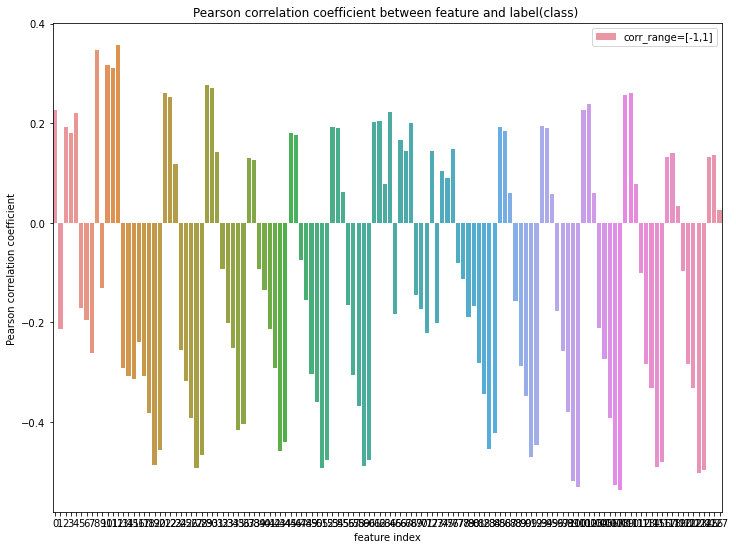

In [44]:
x = corr_output.iloc[:,0].values
height = corr_output.iloc[:,1].values
plt.figure(figsize=(12,9))
plt.title("Pearson correlation coefficient between feature and label(class) ")

plt.bar(x, height, width=0.4, alpha=0.7, color='blue', label="corr_range=[-1,1]")


# sns.barplot(corr_output.iloc[:,0], corr_output.iloc[:,1],label="corr_range=[-1,1]" )


plt.xlabel("feature index")
plt.ylabel("Pearson correlation coefficient ")
plt.legend()
plt.show()

In [33]:
cor_train_X_y_re_minor_corr.describe()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
count,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,...,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000
mean,-0.047362,0.026575,-0.051103,-0.054986,-0.064040,-0.057487,-0.077754,-0.089167,-0.048176,0.024835,...,0.101926,0.042637,0.074296,0.046153,0.037874,0.036708,0.066574,0.084964,0.098150,3.383973
std,0.904299,0.408618,0.911130,0.907480,0.788842,0.899013,0.834971,0.702996,0.908105,0.261112,...,0.531329,0.923890,0.847554,0.929066,0.932764,0.955660,0.864684,0.794448,0.539423,1.727015
min,-0.745972,-2.777269,-0.734354,-0.749373,-0.702953,-0.721690,-0.674876,-0.458444,-0.907517,-1.896170,...,-5.854936,-4.992143,-4.927102,-4.163546,-3.544536,-4.232773,-5.515058,-5.870547,-5.959401,1.000000
25%,-0.629992,-0.075628,-0.646251,-0.660199,-0.583935,-0.639007,-0.602897,-0.421652,-0.691645,-0.089431,...,-0.098217,-0.461008,-0.255626,-0.552092,-0.450281,-0.458884,-0.388027,-0.325557,-0.105117,2.000000
50%,-0.456140,0.183954,-0.469624,-0.476945,-0.419752,-0.475909,-0.459052,-0.357145,-0.317988,0.106374,...,0.227121,0.243102,0.261531,0.282621,0.312692,0.340436,0.265279,0.266853,0.218126,3.000000
75%,0.129121,0.271726,0.213697,0.227844,0.179515,0.138845,0.072500,-0.117991,0.174814,0.204407,...,0.457687,0.773097,0.678319,0.788517,0.764539,0.779932,0.751638,0.708830,0.471140,5.000000
max,4.794328,0.404857,4.387185,5.017353,6.013803,4.694029,5.894141,7.201646,3.995144,0.295008,...,0.728555,1.397350,1.124221,1.363168,1.178672,1.285099,1.178228,1.073211,0.759954,6.000000


In [34]:
print(cor_train_X_y_re_minor_corr[cor_train_X_y_re_minor_corr.isnull()].count(axis=1).sum())
print()


0



In [35]:
import scipy.stats as stats

index_corrScore_re = {}
# Compute Pearson Correlation between label and each feature, 
for i in range(128):
    a= cor_train_X_y_re_minor_corr.iloc[:,i]
    b = cor_train_X_y_re_minor_corr.iloc[:,-1]
    
    # return 2 values，第一个两者之间相关系数， 第二个值为a和b不同为零假设下的p值  
    corr_ab = stats.pearsonr(a,b) 
    
#     corr_ab = round(corr_ab,4)
    
    index_corrScore_re[i]=corr_ab[0]


In [36]:
corr_output_re = pd.DataFrame({'Index':list(index_corrScore_re.keys()), 'feature_corr_label':list(index_corrScore_re.values())})
corr_output_re.sort_values(by="feature_corr_label", ascending=False, inplace=True)
# corr_output.set_index(['Index'],inplace=True)
corr_output_re.to_csv('feature_correlation_label_reeeee.csv', index=False, sep=',')

corr_output_re.head(20)

,Index,feature_corr_label
108,108,0.535620
100,100,0.530801
107,107,0.525964
99,99,0.519343
123,123,0.502402
124,124,0.496712
51,51,0.492989
27,27,0.492442
115,115,0.490733
59,59,0.488353


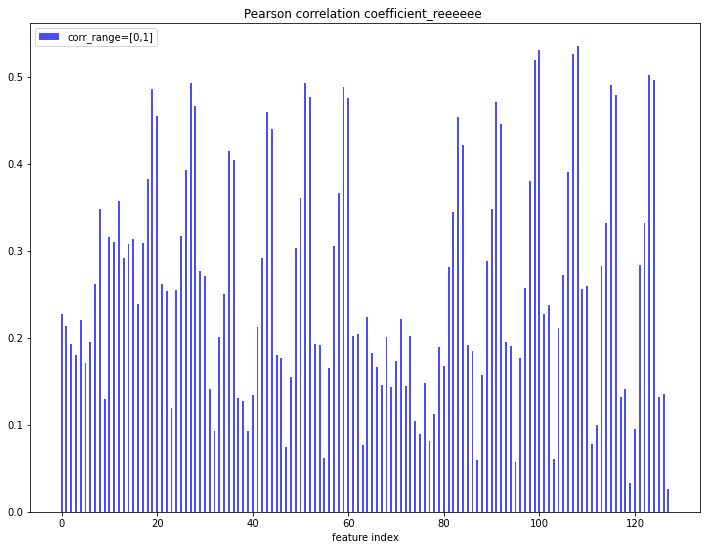

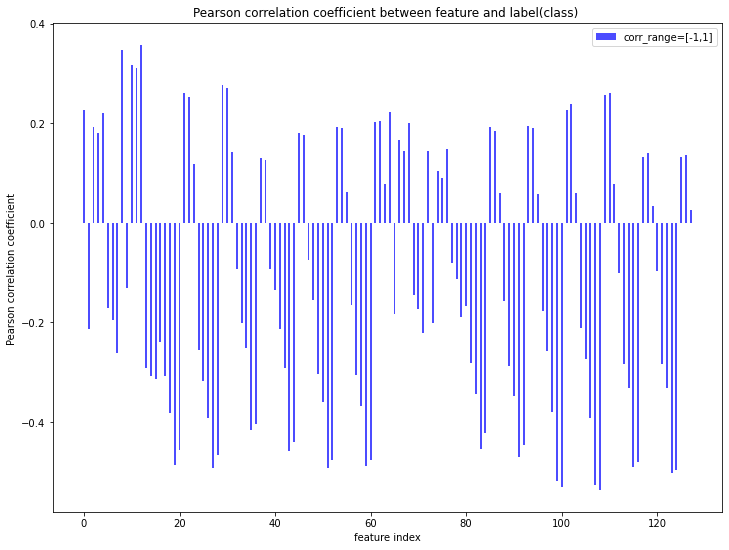

In [37]:
x = corr_output_re.iloc[:,0].values
height = corr_output_re.iloc[:,1].values
plt.figure(figsize=(12,9))
plt.title("Pearson correlation coefficient_reeeeee ")
plt.bar(x, height, width=0.4, alpha=0.7, color='blue', label="corr_range=[0,1]")
plt.xlabel("feature index")

plt.legend()
plt.show()

x = corr_output.iloc[:,0].values
height = corr_output.iloc[:,1].values
plt.figure(figsize=(12,9))
plt.title("Pearson correlation coefficient between feature and label(class) ")
plt.bar(x, height, width=0.4, alpha=0.7, color='blue', label="corr_range=[-1,1]")
plt.xlabel("feature index")
plt.ylabel("Pearson correlation coefficient ")
plt.legend()
plt.show()